In [1]:
#Summarise camera data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandasql
query = pandasql.sqldf

df=pd.read_csv(r'camera_named.csv', parse_dates=['bid_time','start_time','end_time'])
df['bid_time_timestamp']= pd.to_datetime(df['bid_time']).astype(int)
df['start_time_timestamp']=pd.to_datetime(df['start_time']).astype(int)
df['end_time_timestamp']=pd.to_datetime(df['end_time']).astype(int)
df['normalized_bid_time']=(df['bid_time_timestamp']-df['start_time_timestamp'])/(df['end_time_timestamp']-df['start_time_timestamp'])
                                          

/tmp/ipykernel_1754526/3837865484.py:6: FutureWarning: casting datetime64[ns, UTC] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df['bid_time_timestamp']= pd.to_datetime(df['bid_time']).astype(int)
/tmp/ipykernel_1754526/3837865484.py:7: FutureWarning: casting datetime64[ns, UTC] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df['start_time_timestamp']=pd.to_datetime(df['start_time']).astype(int)
/tmp/ipykernel_1754526/3837865484.py:8: FutureWarning: casting datetime64[ns, UTC] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df['end_time_timestamp']=pd.to_datetime(df['end_time']).astype(int)


In [2]:
def investigate(item_id, df):
    one_item = df.loc[df['item_id']==item_id]
    first = one_item.iloc[0]
    ttl = "Product Id: "+ str(first['item_id'])+"\n"+first['product']+"\nStarted: "\
    +first['start_time'].strftime("%d-%b-%Y (%H:%M:%S)")\
    +"\nEnded: "+first['end_time'].strftime("%d-%b-%Y (%H:%M:%S)")
    p = one_item.plot.scatter(x='normalized_bid_time', y='bid_price', title=ttl)

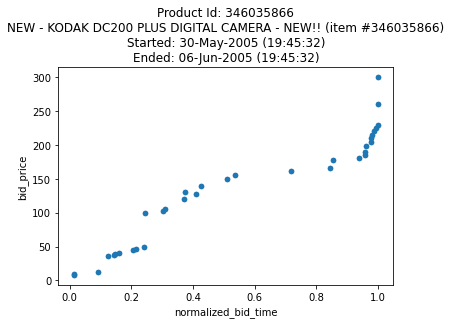

In [3]:
investigate(346035866,df)

In [4]:
items = df.groupby(['item_id'])['bid_price'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)
#items.sort_values('item_id', ascending=False)
print(items)

        item_id  Count
4067  346035866     68
1554  316509884     60
908   310799207     54
4119  346991188     48
1966  319756646     46
...         ...    ...
1371  314711789      1
3846  342544657      1
552   306147586      1
553   306152307      1
479   304886627      1

[4388 rows x 2 columns]


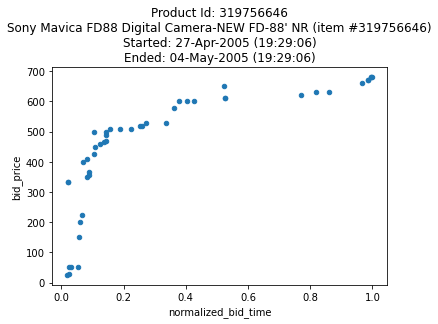

In [5]:
investigate(319756646,df)

In [6]:
bidders = df.groupby(['bidder'])['bid_price'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)
print(bidders)

                   bidder  Count
12489   nosurprisesplease    154
8473   jkhorvath9@aol.com    154
17486             tvannie    118
14824             rwernet     99
12147              n7734r     95
...                   ...    ...
7880             jarrattq      1
7881               jas901      1
7883                jasco      1
7885             jashafra      1
9386           keepitcool      1

[18772 rows x 2 columns]


In [15]:
one_bidder = df.loc[df['bidder']=='nosurprisesplease']

In [8]:
winners =df.loc[df['bid_price']==df['buy_it_now']]

In [9]:
sub_winners = winners.groupby(['item_id'])['bid_price'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)

In [17]:
too_many_winners = sub_winners.loc[sub_winners['Count']>1]

In [21]:
one_winner = query("select * from df where item_id not in (select item_id from too_many_winners)",globals())

In [25]:
multiple = query("select bidder, count(*) as Count from one_winner where bidder!='None' group by bidder having Count >1", globals())
print(multiple)

          bidder  Count
0        !kitten      2
1      !papabear      3
2             $s      5
3         **silk      3
4     *babydoll*      2
...          ...    ...
6677        zugu      4
6678  zyphermoon      5
6679       zzhen      2
6680    zzladams      2
6681      zzmaxx      9

[6682 rows x 2 columns]


In [14]:
only = query("select item_id from df where bidder='$s'", globals())
print (only)

     item_id
0  344186291
1  344319288
2  344322452
3  345636389
4  349837367
